In [21]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [22]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


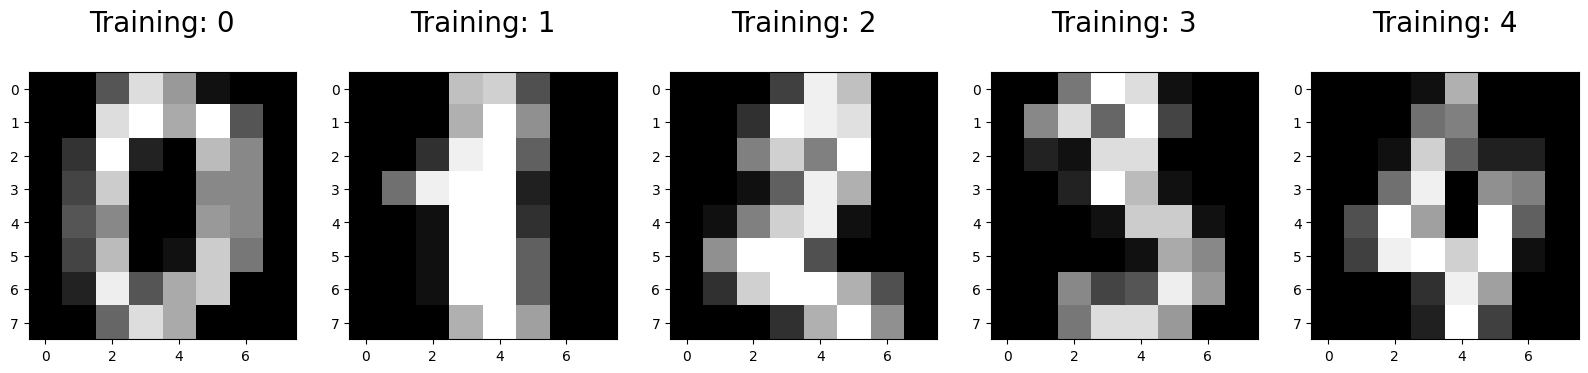

In [23]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [38]:
# import our packages 
from sklearn.model_selection import train_test_split
import pandas as pd
import scipy.io
from sklearn.metrics import confusion_matrix

In [31]:
# Load and split the data
X = digits.data
y = digits.target

# Reshape data to have samples in first dimension
X = X.reshape(-1, 8, 8)

# Flatten our data to have 2 dimensions
X = X.reshape(-1, 8 * 8)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state = 42)

In [32]:
# Create a classification model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
# Import libraries 
from sklearn.model_selection import GridSearchCV

In [37]:
# Tune our model
param_grid = [{
    'n_estimators':[500, 1000, 1500],
    'max_depth':[5, 15, 25, 30, 35]
}]

grid_search = GridSearchCV(clf, 
                         param_grid, 
                         cv=2,
                         scoring='accuracy',
                         n_jobs=-1
)

grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 30, 'n_estimators': 500}

In [39]:
# make predictions on test data
y_pred = clf.predict(X_test)

# Create the confusion matrix
classes = list(digits.target_names)
conf_mat = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(conf_mat)
cm_df

,0,1,2,3,4,5,6,7,8,9
0,32,0,0,0,1,0,0,0,0,0
1,0,28,0,0,0,0,0,0,0,0
2,0,0,33,0,0,0,0,0,0,0
3,0,0,0,32,0,1,0,0,1,0
4,0,0,0,0,46,0,0,0,0,0
5,0,0,0,0,0,46,1,0,0,0
6,0,0,0,0,0,1,34,0,0,0
7,0,0,0,0,0,0,0,33,0,1
8,0,2,0,0,0,0,0,0,28,0
9,0,0,0,0,0,1,0,1,0,38


The model struggled the most with the number 8, I assume that it is because many people
write the number 8 in many different variations this might be the reason for this margin
of error.

In [42]:
# Performance Statistics
print('Precision:', sklearn.metrics.precision_score(y_test, y_pred, average='macro'))
print('Recall:', sklearn.metrics.recall_score(y_test, y_pred, average='macro'))
print('Recall:', sklearn.metrics.f1_score(y_test, y_pred, average='macro'))

NameError: name 'sklearn' is not defined